#Data Description

Source : https://www.kaggle.com/c/instacart-market-basket-analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#instacart 데이터를 모두 불러옵니다.
# for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/Colab Notebooks/data/Instacart Market Basket Analysis/'
aisle = pd.read_csv(base_path +"aisles.csv")
departments = pd.read_csv(base_path + "departments.csv")
prior = pd.read_csv(base_path+"order_products__prior.csv")
train = pd.read_csv(base_path+"order_products__train.csv")
orders = pd.read_csv(base_path+"orders.csv")
products = pd.read_csv(base_path+"products.csv")

In [ ]:
print(aisle.shape, departments.shape, prior.shape, train.shape, orders.shape, products.shape)

(134, 2) (21, 2) (32434489, 4) (1384617, 4) (3421083, 7) (49688, 4)


In [ ]:
#aisel :복도(제품 매대)
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
prior
# 특정 제품/오더를 추가했고 재구매 했다는 내역
# 재구매 내역

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
orders

#days_since_prior_order : 첫구매 이후 재구매하는데 소요된 일자

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
# 문제 : 주어진 고객들의 쇼핑 이용 내역을 기반으로 고객들을 패턴화 해서 정리한다.
# row의 단위는 user단위로 묶어야 한다 : user id로 묵엉서 봐야한다.
# 구매빈도를 바탕으로 고객을 세분화 한다.

In [ ]:

# order id를 갖고 있는 내역들을 합친다.
#orders, prior
#prior의 데이터가 너무 많기 때문에 데이터를 잘라(sampling) 사용한다.
prior_sample = prior[:10000]
prior_sample

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
9995,1022,21903,1,1
9996,1022,38689,2,1
9997,1022,30391,3,1
9998,1022,18670,4,1


In [ ]:
# 불러온 데이터를 합합니다.
temp = pd.merge(orders,prior_sample, on="order_id")
temp = pd.merge(temp,products, on='product_id')
temp = pd.merge(temp,aisle, on = 'aisle_id')
temp = pd.merge(temp,departments, on = 'department_id')


temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
4,40,382,prior,29,1,15,23.0,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,152,103040,prior,12,1,10,7.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9996,959,119941,prior,2,6,13,21.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9997,400,180454,prior,32,0,8,8.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9998,18,118860,prior,3,4,20,6.0,1000,3,0,Apricots,18,10,bulk dried fruits vegetables,bulk


# 2. EDA

In [ ]:
# 1만개의 거래 내역에 대해서 각 물품을 얼마나 샀을까?
temp.user_id.value_counts() # 972명의 고객

# 결과
# 149156    46
# 46,45각 의미하는 것 어떤 유저가 (만개를 잘랐을 때) 이 기간내에 구매한 물품의 개수
# row :어떤 사람이 오더했을 때를 기준으로 정렬 # Primery key : 오더 id+ 유저 id +product id

149156    46
150739    45
11335     44
119437    39
87889     38
          ..
36916      1
99415      1
160167     1
15161      1
154766     1
Name: user_id, Length: 972, dtype: int64

In [ ]:
temp.product_name.value_counts()

Banana                               156
Bag of Organic Bananas               119
Organic Strawberries                  73
Organic Baby Spinach                  70
Organic Hass Avocado                  68
                                    ... 
Organic Bunch Arugula                  1
Russet Potatoes                        1
Organic Whole Crimini Mushrooms        1
Yukon Gold Potatoes                    1
Organic Short Brown Sprouted Rice      1
Name: product_name, Length: 4511, dtype: int64

In [ ]:
temp.aisle.value_counts()

fresh fruits                    1128
fresh vegetables                1076
packaged vegetables fruits       514
yogurt                           395
packaged cheese                  313
                                ... 
first aid                          2
beauty                             1
eye ear care                       1
skin care                          1
bulk grains rice dried goods       1
Name: aisle, Length: 133, dtype: int64

In [ ]:
temp.department.value_counts()

produce            2913
dairy eggs         1647
snacks              862
beverages           801
frozen              746
pantry              598
canned goods        362
bakery              354
deli                319
dry goods pasta     255
household           249
breakfast           238
meat seafood        225
babies              131
personal care       125
international        86
pets                 28
alcohol              27
missing              15
other                13
bulk                  6
Name: department, dtype: int64

In [ ]:
# order_dow : 오더한 요일
temp.order_dow.value_counts()

# order_hour_of_day : 오더한 시간
temp.order_hour_of_day.value_counts()

12    903
13    821
9     818
16    815
10    813
11    793
15    775
17    771
14    706
8     601
18    546
20    373
19    335
7     231
22    175
21    172
23    134
6      95
0      76
1      26
4      16
2       5
Name: order_hour_of_day, dtype: int64

# 3. 데이터 전처리
* 데이터를 transaction 단위로 변경합니다.
* 각자의 방법대로 데이터의 단위를 정해봅시다.


| user 단위로 어떤 물품을 구매햇는지의 정보만 가지는 feature vector로 변환한다. e.g. pd.crosstab, CountVectorizer

In [ ]:
# @title
# transaction -> user-level 단위로 변경하고, User당 정보로 변환하는 과정까지 마무리 합니다.

# 1. department 2. Aisle  3. Product_name
# feature개수가 적어 심플하게 사용 가능한 department를 사용한다.

x = pd.crosstab(index = temp.user_id, columns=temp.department)

x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


4. 클러스터링 모델 적용하기
* 사용하는 클러스터링 모델은 KMeans로 합니다.

[KMean]
* ELbow methood를 이용하여 최적의 k값을 찾아보세요.
* sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 할까요?
* 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산해봅시다.


In [ ]:
# data setting
x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#tSNE : 시각화 용도의 차원감소 기법 (2차원으로 데이터를 줄여서 변환해 주는 기법_2차원으로 데이터를 줄여서 점을 찍어서 데이터를 볼 수 있게 해준다.)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)  #데이터를 2차원으로 변환한다.
tsne_data = tsne.fit_transform(x)
tsne_data


array([[-20.034443,  -8.975622],
       [-13.795248,  20.915438],
       [-20.78622 ,   3.348977],
       ...,
       [-12.826371,  -3.290743],
       [-26.488049, -11.276317],
       [ 10.057174,  -9.300096]], dtype=float32)

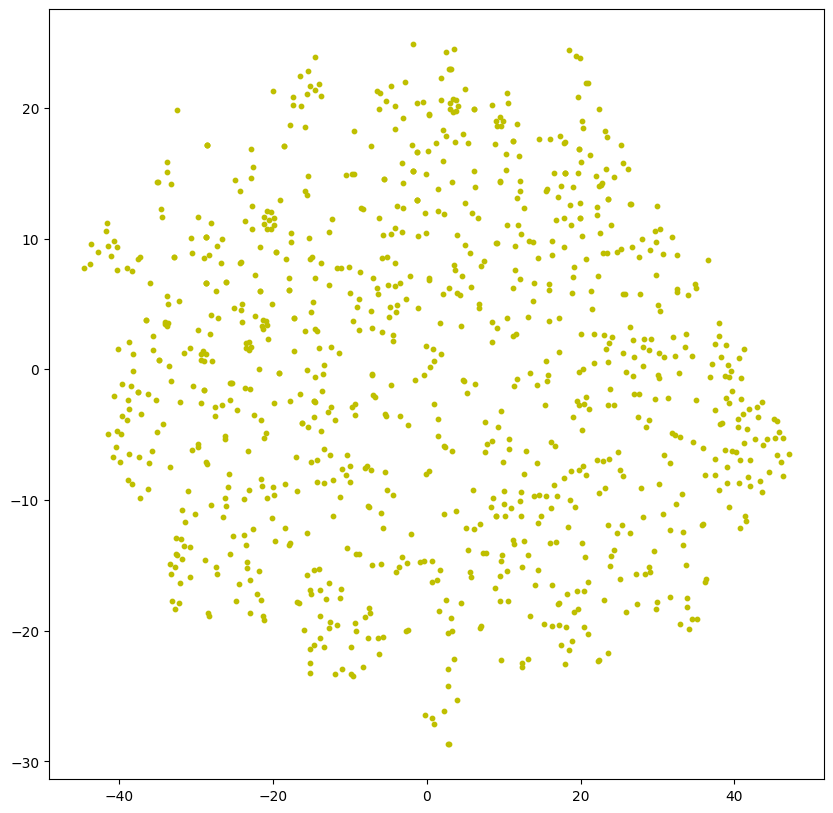

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=10,c='y')

plt.show()

In [ ]:
# KMean를 돌려봅시다.
from sklearn.cluster import KMeans # Kmeans
from sklearn.cluster import AgglomerativeClustering# Hierarchical Agglomerative Clustering
from sklearn.cluster import DBSCAN # DBSCAN
from sklearn.cluster import SpectralClustering # Spectral Clustering

#평가 함수
from sklearn.metrics import silhouette_score

#Clustering = model 변수로 불러온다.
model = KMeans(n_clusters=4)
model2 = KMeans(n_clusters=2)



#n_cluster
#model.fit(x)  # unsupervised setting(데이터를 전체 사용하지 않았기 때문이다.)
#unsupervised setting
pred= model.fit_predict(x)
pred2 = model2.fit_predict(x)

#pred
#학습완료

print("Silhouette_score : %.4f"% silhouette_score(x,pred))
print("Silhouette_score : %.4f"% silhouette_score(x,pred2))

#silhouette_score은 true 값이 없다.
# 결과값 : Silhouette_score : 0.1909

#silhouette_score은 -1< - <1사이의 값
# 1에 가까울수록 좋은 결과값


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette_score : 0.1914
Silhouette_score : 0.3641


In [ ]:
from re import X
# elbouw method
# 전체 공간에서 더 많은 값들로 나누면 , 데이터 간의 거리의 합이 작아진다()
sse = []
silhouettes = [] # 다 돌려본 다음 실루엣에서 가장 높은 값을 best 값으로 정한다.


for K in range(2,11):
  model = KMeans(n_clusters=K)  #K : 2-10
  pred = model.fit_predict(x)
  sse.append(model.inertia_) #SSE
  silhouettes.append(silhouette_score(x,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

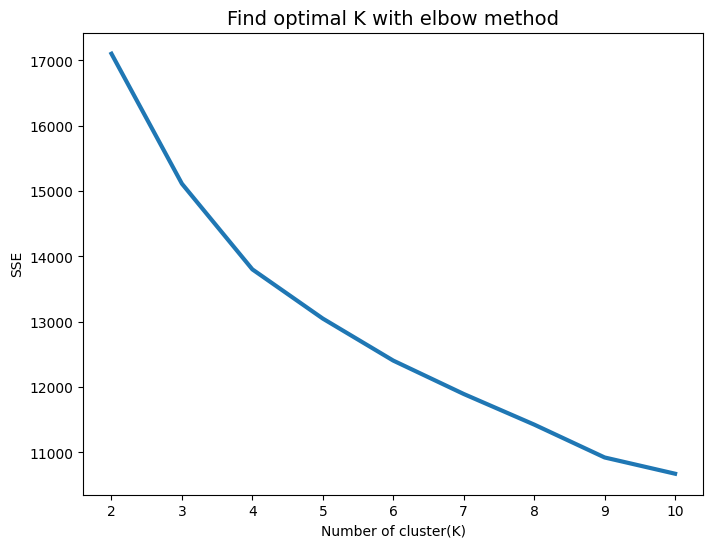

In [ ]:
# 최적의 k는 어떻게 구할까요?
# Elbow method : 정해진 k에 대해서 SSE를 계산한 다음, SSE 가 가장 많이 꺾이는 k(elow)가 optimal k라고 판단하는 방법

plt.figure(figsize=(8,6))
plt.title("Find optimal K with elbow method", fontsize=14)
plt.xlabel("Number of cluster(K)", fontsize=10)
plt.ylabel("SSE", fontsize=10)
plt.plot(range(2,11), sse, lw=3)
plt.show()

#elbow method best case = 4

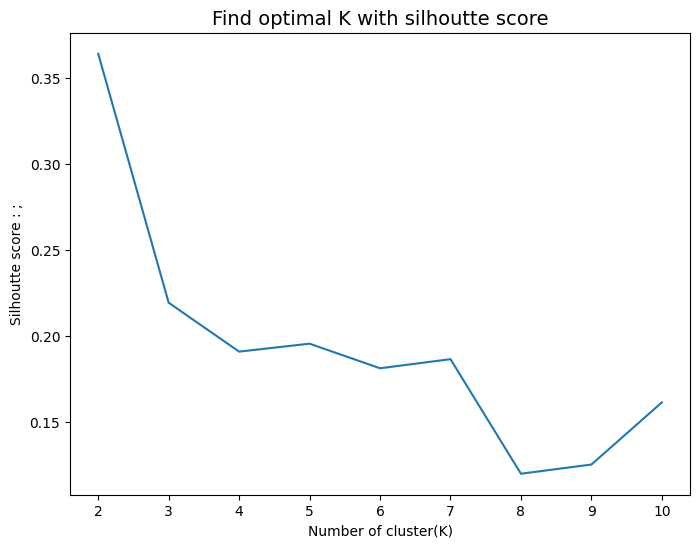

In [ ]:
#Silhouette score :같은 클러스터에 속하는 데이터 중 가장 먼 테이터의 거리와 다른 클러스터에 속하는 데이터 중 가장 가까운 데이터와의 거리 비율을 계산한 지표
#[-1,1]

plt.figure(figsize=(8,6))
plt.title("Find optimal K with silhoutte score", fontsize=14)
plt.xlabel("Number of cluster(K)", fontsize=10)
plt.ylabel("Silhoutte score : ;", fontsize=10)
plt.plot(range(2,11), silhouettes)
plt.show()

#silhoutte best 지수 = 2

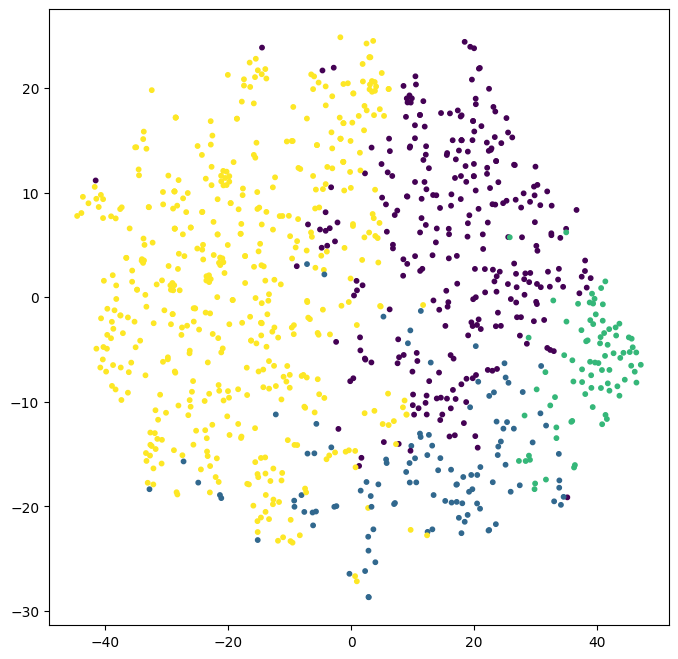

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=10,c=pred, cmap="viridis")

plt.show()

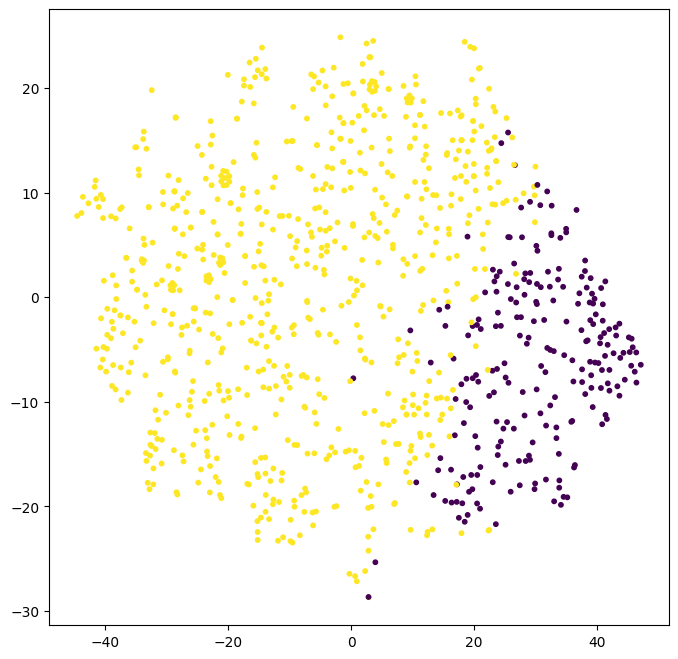

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=10,c=pred2, cmap="viridis")

plt.show()

In [ ]:
# sse summary

#pred2 사이즈
len(pred2)
x["cluster_label"] = pred2
x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,other,pantry,personal care,pets,produce,snacks,cluster label,cluster_label,Cluster_label2,Cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,1,1,1,3
503,0,0,0,0,1,0,2,1,0,0,...,0,1,0,0,2,0,1,1,1,3
971,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,3
1059,0,0,3,0,3,0,0,8,0,0,...,0,2,0,0,8,2,0,0,0,1
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,2,2,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,3
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,4,1,1,1,1,0
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,1,1,1,3


In [ ]:
#loc로 분할하기
group1 = x.loc[x.cluster_label == 0, :]
group2 = x.loc[x.cluster_label == 1,:]

print(group1.shape, group2.shape)



(222, 25) (750, 25)


In [ ]:
#가장 많이 팔렸던 품목의 평균
#. top3. product, dairy eggs, snacks
group1.mean()

department
alcohol            0.009009
babies             0.234234
bakery             0.590090
beverages          0.986486
breakfast          0.391892
bulk               0.018018
canned goods       0.675676
dairy eggs         3.117117
deli               0.621622
dry goods pasta    0.463964
frozen             1.153153
household          0.270270
international      0.139640
meat seafood       0.450450
missing            0.018018
other              0.004505
pantry             0.963964
personal care      0.126126
pets               0.036036
produce            7.486486
snacks             1.423423
cluster label      0.000000
cluster_label      0.000000
Cluster_label2     0.000000
Cluster_label      0.986486
dtype: float64

In [ ]:
#가장 많이 팔렸던 품목의 평균
#. top3. product, dairy eggs, baverages
group2.mean()

department
alcohol            0.033333
babies             0.105333
bakery             0.297333
beverages          0.776000
breakfast          0.201333
bulk               0.002667
canned goods       0.282667
dairy eggs         1.273333
deli               0.241333
dry goods pasta    0.202667
frozen             0.653333
household          0.252000
international      0.073333
meat seafood       0.166667
missing            0.014667
other              0.016000
pantry             0.512000
personal care      0.129333
pets               0.026667
produce            1.668000
snacks             0.728000
cluster label      1.000000
cluster_label      1.000000
dtype: float64

In [ ]:
# sse summary

#pred2 사이즈
len(pred2)
x["cluster_label"] = pred2
x["Cluster_label2"] = pred2
x

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,other,pantry,personal care,pets,produce,snacks,cluster label,cluster_label,Cluster_label2,Cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,1,1,1,3
503,0,0,0,0,1,0,2,1,0,0,...,0,1,0,0,2,0,1,1,1,3
971,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,3
1059,0,0,3,0,3,0,0,8,0,0,...,0,2,0,0,8,2,0,0,0,1
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,2,2,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,3
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,4,1,1,1,1,0
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,1,1,1,3


In [ ]:
#loc로 분할하기
group1 = x.loc[x.cluster_label == 0, :]
group2 = x.loc[x.cluster_label == 1,:]
group3 = x.loc[x.Cluster_label == 2, :]
group4 = x.loc[x.Cluster_label == 3,:]

print(group1.shape, group2.shape, group3.shape, group4.shape)


(222, 25) (750, 25) (82, 25) (493, 25)


In [ ]:
group3.mean()

department
alcohol             0.012195
babies              0.243902
bakery              0.560976
beverages           1.353659
breakfast           0.317073
bulk                0.036585
canned goods        0.768293
dairy eggs          3.036585
deli                0.853659
dry goods pasta     0.426829
frozen              1.280488
household           0.317073
international       0.134146
meat seafood        0.329268
missing             0.012195
other               0.000000
pantry              0.975610
personal care       0.097561
pets                0.073171
produce            10.621951
snacks              1.304878
cluster label       0.000000
cluster_label       0.000000
Cluster_label2      0.000000
Cluster_label       2.000000
dtype: float64

In [ ]:
group4.mean()

department
alcohol            0.040568
babies             0.085193
bakery             0.233266
beverages          0.770791
breakfast          0.176471
bulk               0.002028
canned goods       0.225152
dairy eggs         1.002028
deli               0.200811
dry goods pasta    0.176471
frozen             0.569980
household          0.259635
international      0.056795
meat seafood       0.129817
missing            0.006085
other              0.018256
pantry             0.432049
personal care      0.119675
pets               0.022312
produce            0.831643
snacks             0.626775
cluster label      1.000000
cluster_label      1.000000
Cluster_label2     1.000000
Cluster_label      3.000000
dtype: float64

unsuperrvised maner로 하는 것은 데이터의 라벨을 잘 모르기 때문이다.
변경해 보면 좋은것.
> feature을 aisle로 변경해서 해보기
> 데이터를 1만개 보다 많이 변경해서 (만개의 고객거래 내역은 사실 미비한 것이기 때문에 고객에 댇한 충분한 정보를 제공한 것이 아닐 수 있다. )
> 빈도 이외에 다른 정보를 추가해서 고객을 다양하게 표현해 본다.
> clustering 알고리즘을 다른것으로 사용해 본다.